아달린 : 퍼셉트론과 비슷하지만... 비용함수가 존재  학습을 배치단위로 하면서 가중치를 업데이트 한다.

이전시간에 만든 퍼셉트론에서 fit메서드만 바꿔서 경사하강법으로 비용함수가 최소가 되로고 가중치를 업데이트

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [9]:
class AdalineGD(object):
  ''' 아달린
  parameter : 
    eta : float (0.0~1.0)  학습률
    n_iter : int  반복훈련 횟수
    random_sate : int 랜덤시드값
    w_ : 가중치(학습)
    cost_ : list  에포크마다 누적된 비용함수의 제곱합
  '''
  def __init__(self,eta=0.01, n_iter=50, random_state = 1) -> None:
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, x,y):
    ''' 훈련함수
      x : array, shape = (samples, features )
      y : array, shape = (samples )      
    '''
    rgen = np.random.RandomState(self.random_state)
    self.w_ =  rgen.normal(loc=0.0, scale=0.01,size=1+x.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(x);
      output = self.activation(net_input);
      errors = (y - output)
      # x 행렬, erros 벡터
      # 행렬-벡터 곱셈  x.T.dot(erros)
      self.w_[1:] += self.eta*x.T.dot(errors)
      self.w_[0] += self.eta*errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, x):
    '''최종입력 함수'''
    return np.dot(x, self.w_[1:]) + self.w_[0]
  def activation(self, x):
    '''선형 활성화 계산
    단순 항등 함수이기때문에 아무런 영향을 미치지 않음
    '''
    return x
  def predict(self, x):
    ''' 단위 계단함수를 사용해서 클래스 레이블을 반환'''
    return np.where(self.activation(self.net_input(x)) >=0.0, 1, -1  )
  


In [4]:
# eta 0.1  / 0.0001

In [ ]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df =  pd.read_csv(s,header=None)
df = df.iloc[:100]
x = df.iloc[:,[0,2]]
y = df.iloc[:,-1]
y[:50] = -1
y[50:] = 1
y = y.astype(int)
x = x.to_numpy()
y = y.to_numpy()

In [31]:
ada1 = AdalineGD(eta = 0.01, n_iter = 10).fit(x , y)
ada2 = AdalineGD(eta = 0.0001, n_iter = 10).fit(x, y)

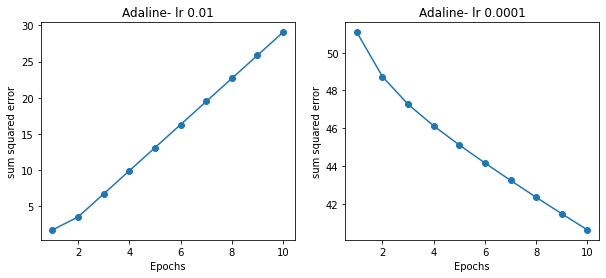

In [32]:
fig, ax = plt.subplots(1,2,figsize = (10,4))
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("sum squared error")
ax[0].set_title('Adaline- lr 0.01')

ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("sum squared error")
ax[1].set_title('Adaline- lr 0.0001')
plt.show()

표준화  (각원소 - 평균) / 표준편차

In [30]:
x_std = np.copy(x)
x_std[:, 0] = (x[:,0] - x[:,0].mean() ) / x[:,0].std()
x_std[:, 1] = (x[:,1] - x[:,1].mean() ) / x[:,1].std()

In [39]:
ada = AdalineGD(eta=0.01,n_iter=20).fit(x_std, y)

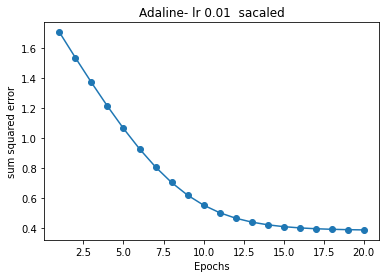

In [40]:
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel("Epochs")
plt.ylabel("sum squared error")
plt.title('Adaline- lr 0.01  sacaled')
plt.show()